# Load modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2


import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import holoviews as hv
import csv
import math

from scipy.stats import zscore
from dask.distributed import Client, LocalCluster
from holoviews.operation.datashader import datashade, regrid
from holoviews.util import Dynamic
from IPython.core.display import display
from dtaidistance import dtw

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
minian_path = "."

In [2]:
%%capture
sys.path.insert(0, minian_path)
from minian.utilities import (
    open_minian,
    match_information,
    match_path,
    TaskAnnotation
)

from post_minian.postprocessing import (
    FeatureExploration,
    CellClustering,
    NewFeatures
)

from post_minian.visualization import (
    plot_multiple_traces,
    plot_multiple_traces_segment
)

import warnings
warnings.filterwarnings('ignore')

# Specify data location

In [3]:
dpath = "/N/project/Cortical_Calcium_Image/Miniscope data/06.2022_Second_group/AA017_985237_D1/2022_06_06/16_22_30/Miniscope_2/S1/"
mouseID, day, session = match_information(dpath)
mouse_path, video_path = match_path(dpath)
timeStamp = os.path.join(video_path,"timeStamps.csv")
minian_ds_path = os.path.join(dpath, "minian")
feature_explorer = FeatureExploration(dpath)

# Plot traces

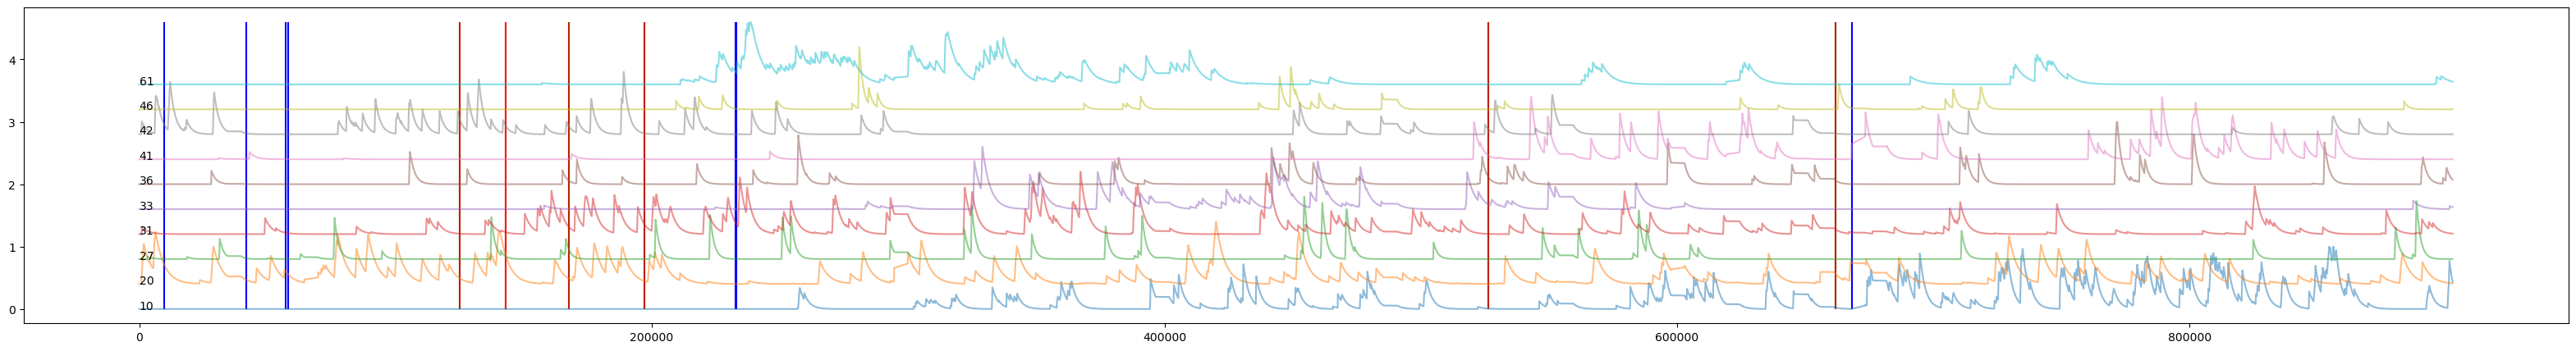

In [4]:
plot_multiple_traces(feature_explorer,feature_explorer.data['unit_ids'])

# Find feature

## Pre-process data

## Get sections

In [5]:
time_window = 140
delay = 0
include_prior = True
timesteps_ALP = feature_explorer.get_timestep('ALP')
timesteps_IALP = feature_explorer.get_timestep('IALP')
timesteps_RNFS = feature_explorer.get_timestep('RNFS')
section_ALPs = []
section_IALPs = []
section_RNFSs = []
for timestep in timesteps_ALP:
    section1 = feature_explorer.get_section(timestep-20, time_window, delay, include_prior, type="C")
    section_ALPs.append(section1)
for timestep in timesteps_IALP:
    section2 = feature_explorer.get_section(timestep-20, time_window, delay, include_prior, type="C")
    section_IALPs.append(section2)
for timestep in timesteps_RNFS:
    section3 = feature_explorer.get_section(timestep-20, time_window, delay, include_prior, type="C")
    section_RNFSs.append(section3)

In [27]:
neurons = feature_explorer.data['unit_ids']
A = {}
for i in neurons:
    A[i] = feature_explorer.data['A'].sel(unit_id = i)

array([[2.54487824e-04, 2.50605787e-04, 2.46782968e-04, ...,
        1.33998207e+00, 1.31954155e+00, 1.29941283e+00],
       [7.94718894e-02, 7.86932104e-02, 7.79221611e-02, ...,
        3.26203235e+00, 3.23007040e+00, 3.19842161e+00],
       [1.31659394e-04, 1.28867474e-04, 1.26134758e-04, ...,
        3.30492396e-04, 3.23484096e-04, 3.16624411e-04],
       ...,
       [1.06877482e-05, 1.05046799e-05, 1.03247474e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.78302911e-06, 1.76818109e-06, 1.75345671e-06, ...,
        4.98895329e-06, 4.94740760e-06, 4.90620789e-06]])

In [30]:
feature_vector = NewFeatures(A = A, ALP=section_ALPs,IALP=section_IALPs,RNFS=section_RNFSs)

# Clustering

In [32]:
cellClustering = CellClustering(feature_vector.values)
cellClustering.visualize_dendrogram()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices